<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporando-Pacotes" data-toc-modified-id="Imporando-Pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporando Pacotes</a></span></li><li><span><a href="#Função-de-Entrada" data-toc-modified-id="Função-de-Entrada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Função de Entrada</a></span></li><li><span><a href="#Dicionários" data-toc-modified-id="Dicionários-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dicionários</a></span></li><li><span><a href="#Cenários" data-toc-modified-id="Cenários-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cenários</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Imporando Pacotes

In [1]:
# Importando as bibliotecas
import numpy as np # pacote para funções matemáticas
import pandas as pd # pacote para a manipulação dos dados em tabela
import warnings
import itertools
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt # pacote para fazer gráficos
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
import scikitplot as skplt
import sqlite3 as sql

import pandas_ta as ta
import talib

import mplfinance as mpf

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from futures_backtester import Backtester

# Função de Entrada

In [3]:
import importlib
name_strategy = 'bb_anti_trend'  # Nome da função/classe no módulo entries
module = importlib.import_module('entries')
entrada = getattr(module, name_strategy)

# Dicionários

In [4]:



path_b3 = 'C:/Users/User/OneDrive/Documentos/rnt/Finance/Trading Projects/00.database/candlestick data/futuros/'
path_tickmill = 'C:/Users/User/OneDrive/Documentos/rnt/Finance/Trading Projects/00.database/tickmill/forex/'

dict_custos = {'WIN@N':0.2*5, 'WDO@N':2.40/2,
                                     'AUDUSD': 3,
                                     'EURUSD': 3,
                                     'GBPUSD': 3,
                                     'NZDUSD': 3,
                                     'USDCHF': 3,
                                     'USDJPY': 3,
                                     'AUDCAD': 3,
                                     'AUDCHF': 3,
                                     'AUDJPY': 3,
                                     'AUDNZD': 3,
                                     'CADCHF': 3,
                                     'CADJPY': 3,
                                     'CHFJPY': 3,
                                     'EURAUD': 3,
                                     'EURCAD': 3,
                                     'EURCHF': 3,
                                     'EURGBP': 3,
                                     'EURHKD': 3,
                                     'EURJPY': 3,
                                     'EURMXN': 3,
                                     'EURNZD': 3,
                                     'EURTRY': 3,
                                     'GBPCAD': 3,
                                     'GBPCHF': 3,
                                     'GBPJPY': 3,
                                     'USDCNH': 3,
                                     'USDCZK': 3,
                                     'USDMXN': 3,
                                     'USDTRY': 3,
                                     'XAGUSD': 3,
                                     'XAUUSD': 3,
                                     'STOXX50': 3,
                                     'UK100': 3,
                                     'FRANCE40': 3,
                                     'VIX': 3,
                                     'ALUMINIUM': 3,
                                     'PLATINUM': 3,
                                     'LEAD': 3,
                                     'NICKEL': 3,
                                     'PALLADIUM': 3,
                                     'ZINC': 3,
                                     'COPPER': 3,
                                     'DXY': 3,
                                     'COCOA': 3,
                                     'SUGAR': 3,
                                     'WHEAT': 3,
                                     'US500': 3,
                                     'NAT.GAS': 3,
                                     'BRENT': 3,
                                     'EEM': 3,
                                     'EWZ': 3,
                                     'IWM': 3,
                                     'TLT': 3,
                                     'SPY': 3,
                                     'DIA': 3}

dict_valor_lot = {'WIN@N':0.2, 'WDO@N':10.0,
                                'USDCAD': 100000,
                                 'AUDUSD': 100000,
                                 'EURUSD': 100000,
                                 'GBPUSD': 100000,
                                 'NZDUSD': 100000,
                                 'USDCHF': 100000,
                                 'USDJPY': 100000,
                                 'AUDCAD': 100000,
                                 'AUDCHF': 100000,
                                 'AUDJPY': 100000,
                                 'AUDNZD': 100000,
                                 'CADCHF': 100000,
                                 'CADJPY': 100000,
                                 'CHFJPY': 100000,
                                 'EURAUD': 100000,
                                 'EURCAD': 100000,
                                 'EURCHF': 100000,
                                 'EURGBP': 100000,
                                 'EURHKD': 100000,
                                 'EURJPY': 100000,
                                 'EURMXN': 100000,
                                 'EURNZD': 100000,
                                 'EURTRY': 100000,
                                 'GBPCAD': 100000,
                                 'GBPCHF': 100000,
                                 'GBPJPY': 100000,
                                 'USDCNH': 100000,
                                 'USDCZK': 100000,
                                 'USDMXN': 100000,
                                 'USDTRY': 100000,
                                 'XAGUSD': 100000,
                                 'XAUUSD': 100000,
                                 'STOXX50': 100000,
                                 'UK100': 100000,
                                 'FRANCE40': 100000,
                                 'VIX': 100000,
                                 'ALUMINIUM': 100000,
                                 'PLATINUM': 100000,
                                 'LEAD': 100000,
                                 'NICKEL': 100000,
                                 'PALLADIUM': 100000,
                                 'ZINC': 100000,
                                 'COPPER': 100000,
                                 'DXY': 100000,
                                 'COCOA': 100000,
                                 'SUGAR': 100000,
                                 'WHEAT': 100000,
                                 'US500': 100000,
                                 'NAT.GAS': 100000,
                                 'BRENT': 100000,
                                 'EEM': 100000,
                                 'EWZ': 100000,
                                 'IWM': 100000,
                                 'TLT': 100000,
                                 'SPY': 100000,
                                 'DIA': 100000}

dict_path = {'WIN@N':path_b3, 'WDO@N':path_b3, 
                              'USDCAD': path_tickmill,
                             'AUDUSD': path_tickmill,
                             'EURUSD': path_tickmill,
                             'GBPUSD': path_tickmill,
                             'NZDUSD': path_tickmill,
                             'USDCHF': path_tickmill,
                             'USDJPY': path_tickmill,
                             'AUDCAD': path_tickmill,
                             'AUDCHF': path_tickmill,
                             'AUDJPY': path_tickmill,
                             'AUDNZD': path_tickmill,
                             'CADCHF': path_tickmill,
                             'CADJPY': path_tickmill,
                             'CHFJPY': path_tickmill,
                             'EURAUD': path_tickmill,
                             'EURCAD': path_tickmill,
                             'EURCHF': path_tickmill,
                             'EURGBP': path_tickmill,
                             'EURHKD': path_tickmill,
                             'EURJPY': path_tickmill,
                             'EURMXN': path_tickmill,
                             'EURNZD': path_tickmill,
                             'EURTRY': path_tickmill,
                             'GBPCAD': path_tickmill,
                             'GBPCHF': path_tickmill,
                             'GBPJPY': path_tickmill,
                             'USDCNH': path_tickmill,
                             'USDCZK': path_tickmill,
                             'USDMXN': path_tickmill,
                             'USDTRY': path_tickmill,
                             'XAGUSD': path_tickmill,
                             'XAUUSD': path_tickmill,
                             'STOXX50': path_tickmill,
                             'UK100': path_tickmill,
                             'FRANCE40': path_tickmill,
                             'VIX': path_tickmill,
                             'ALUMINIUM': path_tickmill,
                             'PLATINUM': path_tickmill,
                             'LEAD': path_tickmill,
                             'NICKEL': path_tickmill,
                             'PALLADIUM': path_tickmill,
                             'ZINC': path_tickmill,
                             'COPPER': path_tickmill,
                             'DXY': path_tickmill,
                             'COCOA': path_tickmill,
                             'SUGAR': path_tickmill,
                             'WHEAT': path_tickmill,
                             'US500': path_tickmill,
                             'NAT.GAS': path_tickmill,
                             'BRENT': path_tickmill,
                             'EEM': path_tickmill,
                             'EWZ': path_tickmill,
                             'IWM': path_tickmill,
                             'TLT': path_tickmill,
                             'SPY': path_tickmill,
                             'DIA': path_tickmill}

# Cenários

In [5]:
# 5 min - win'
{'sl': 1486, 'tp': 1134, 'BB_LENGTH': 10, 'STD': 1.84}
{'sl': 2471, 'tp': 1438, 'BB_LENGTH': 8, 'STD': 1.80}
{'sl': 1650, 'tp': 1480, 'BB_LENGTH': 9, 'STD': 1.45}

# 5 min - wdo
{'sl': 29, 'tp': 27, 'BB_LENGTH': 9, 'STD': 1.2114296789710028}
{'sl': 12, 'tp': 11, 'BB_LENGTH': 7, 'STD': 1.405428218011036}

params = {'sl': 10.0,
 'tp': 3.0,
 'BB_LENGTH': 8,
 'STD': 1.58} # 16h

{'sl': 12, 'tp': 11, 'BB_LENGTH': 7, 'STD': 1.405428218011036}

In [6]:
params = {'sl': 280, 'tp': 1800, 'BB_LENGTH': 8, 'STD': 1.80}
params = {'sl': 8, 'tp': 15, 'BB_LENGTH': 7, 'STD': 1.405428218011036}

In [182]:
params = {'sl': 12, 'tp': 5, 'BB_LENGTH': 7, 'STD': 1.41}
params = {'sl': 11.017086085771325,
 'tp': 5.9964377344429955,
 'BB_LENGTH': 6,
 'STD': 1.6066382045598149}


params = {'sl': 14.0,
 'tp': 8.0,
 'BB_LENGTH': 4,
 'STD': 1.10}

params = {'sl': 6.012414861795595,
 'tp': 17.448994889177445,
 'BB_LENGTH': 7,
 'STD': 1.5385021702381745}



In [183]:
# Configurar o backtester
sym = 'WDO@N'
#sym = 'WIN@N'
#sym = 'EURUSD'
#sym = 'USDJPY'

bt = Backtester(
    symbol = sym,
    timeframe = 't5',
    data_ini='2019-01-01',
    data_fim='2025-06-14',
    tp = params['tp'],
    sl = params['sl'],
    slippage = 0,
    tc = dict_custos[sym], # $ per lot
    lote = 1.0,
    valor_lote= dict_valor_lot[sym],
    initial_cash = 30000,
    path_base= dict_path[sym],
    daytrade = True
)

# Parâmetros da estratégia RSI
BB_LENGTH = params['BB_LENGTH']
STD = params['STD']

# Executa o backtest com a estratégia RSI
results, metrics = bt.run(
    signal_function=entrada, 
    signal_args={
        "bb_length": BB_LENGTH,
        "std": STD,
        'allowed_hours': [12,13,15],
        #'allowed_hours': [16],
        'position_type':'long'
    }
)


# Print de métricas
bt.print_metrics(metrics)

RELATÓRIO DE DESEMPENHO
Símbolo: WDO@N
Timeframe: t5
Período: 2019-01-01 a 2025-06-14

--- RESULTADOS ---
Saldo Inicial: $30000.00
Saldo Final: $54992.51
Retorno Total: $24992.51 (83.31%)
Retorno Anualizado: 10.53%
Volatilidade Anualizada: 7.85%

--- DRAWDOWN ---
Drawdown Máximo: 8.68%
Drawdown Máximo (Valor): $3555.19
Tempo Máximo em Drawdown: 24181.0 períodos
Tempo em Drawdown: 92.05% do total

--- TRADES ---
Total de Trades: 4280
Trades Vencedores: 1417 (33.11%)
Trades Perdedores: 2863 (66.89%)
Saídas por TP: 23.46%
Saídas por SL: 64.63%
Saídas por Tempo: 11.92%

--- RATIOS ---
Sharpe Ratio: 1.341
Sortino Ratio: 2.948
Calmar Ratio: 1.213
Profit Factor: 1.143

--- ANÁLISE DE GANHOS/PERDAS ---
Ganho Médio: $141.23
Perda Média: $61.17
Win/Loss Ratio: 2.31
Expectancy: $5.84


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x1000 with 0 Axes>

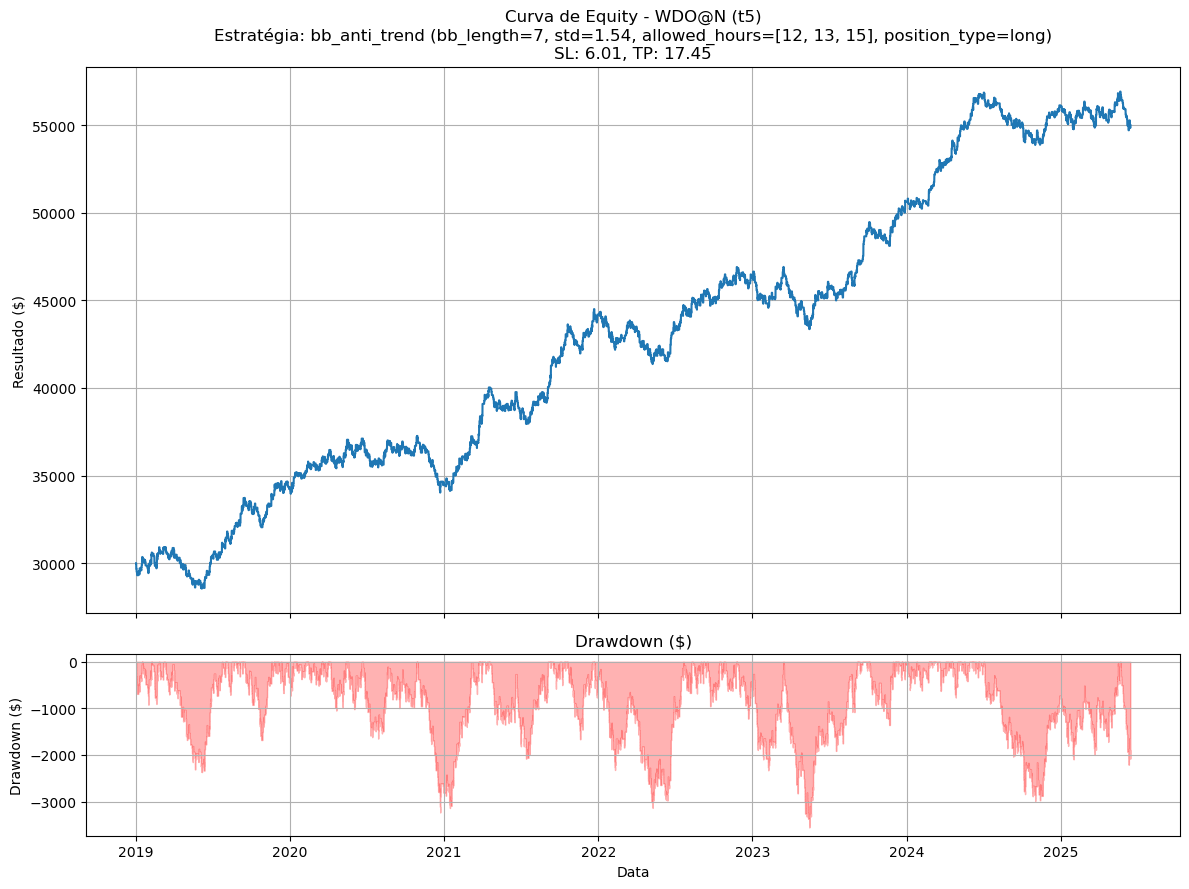

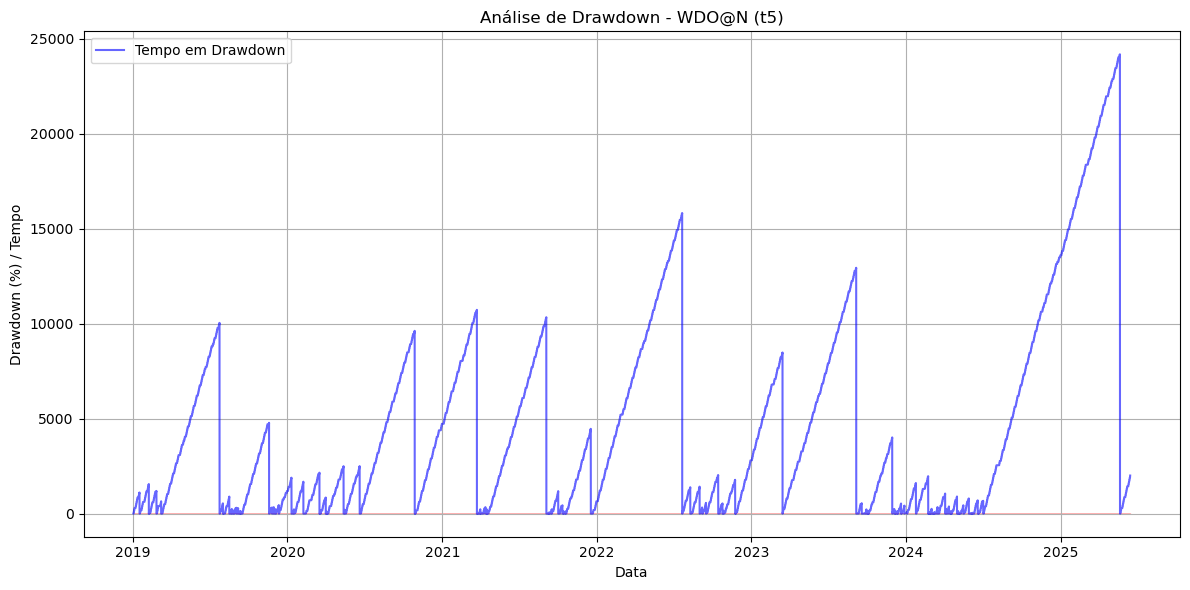

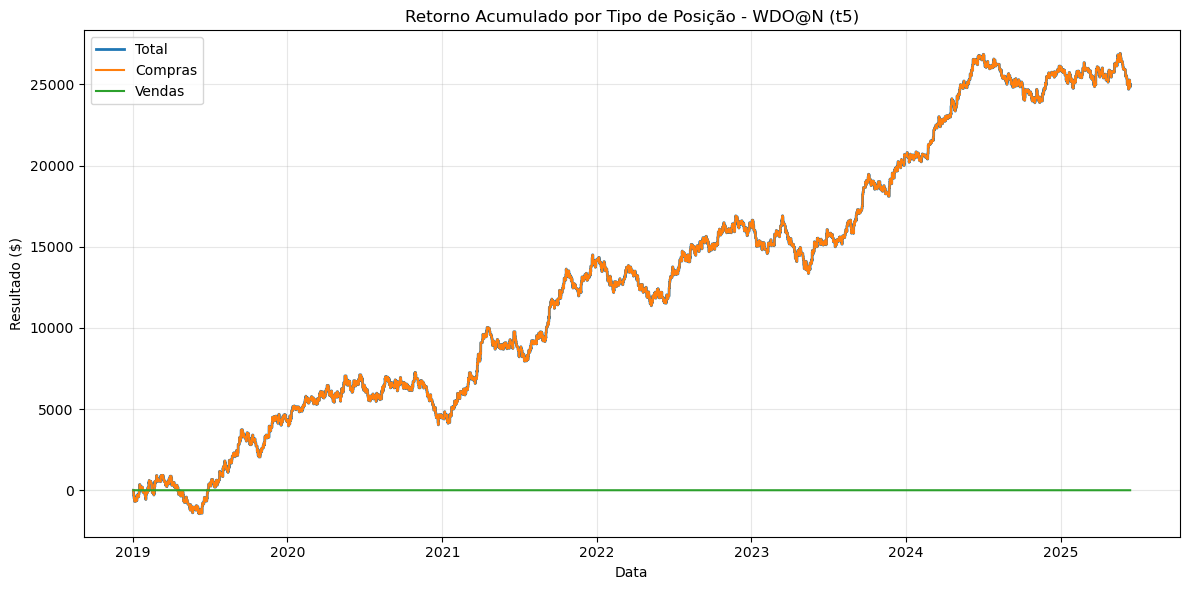

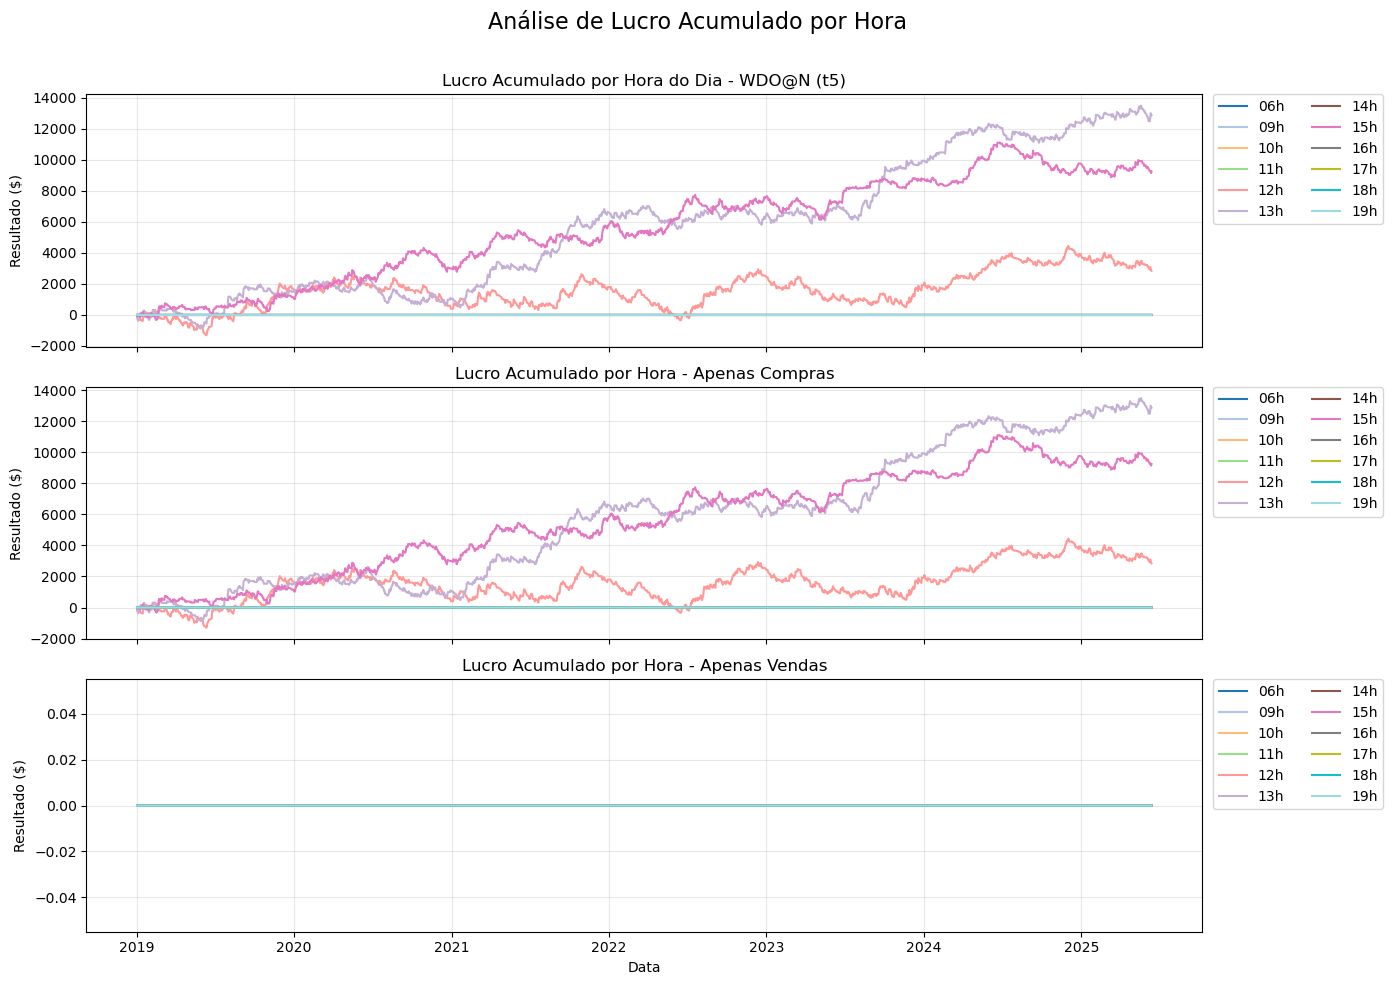

In [184]:
# Plotar a curva de equity com drawdown
plt.figure(figsize=(14, 10))

# 1. Curva de equity
plt = bt.plot_equity_curve(include_drawdown=True)

# 2. Análise detalhada de drawdown
plt = bt.plot_drawdown()

# 3. resultado por hora
bt.plot_by_position()
bt.plot_cumulative_by_hour()

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

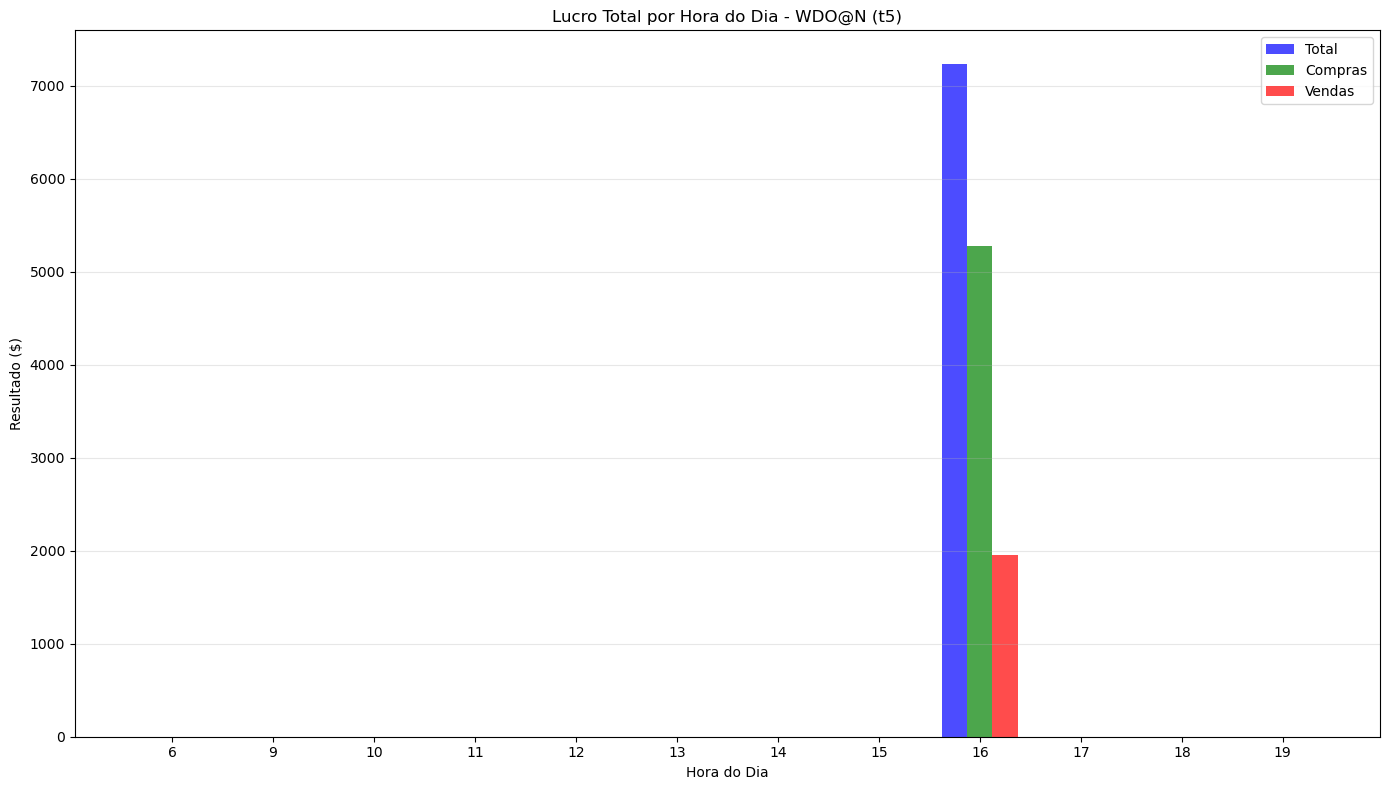

In [46]:
bt.plot_profit_by_hour()

# Otimização

In [158]:
metrics

{'total_return': 349825.0,
 'total_trades': 19190,
 'win_trades': 7859,
 'loss_trades': 11285,
 'win_rate': 0.4095362167795727,
 'tp_rate': 0.06175091193329859,
 'sl_rate': 0.47170401250651384,
 'time_exit_rate': 0.4665450755601876,
 'profit_factor': 1.2336442356178474,
 'max_drawdown': 1.0684931506849316,
 'max_drawdown_value': 20682.0,
 'max_time_underwater': 27241.0,
 'underwater_rate': 0.976249427725196,
 'sharpe_ratio': 1.3473779398793917,
 'sortino_ratio': 1086.439815934077,
 'calmar_ratio': 16.914466686007156,
 'avg_win': 235.02735717012342,
 'avg_loss': 132.67656180770936,
 'win_loss_ratio': 1.7714308689333764,
 'expectancy': 17.911510065494795}

In [180]:
def objective_ind(trial):  
    
    '''
    função para maximizar os ganhos no mini-indice
    '''

    # Configurar o backtester
    sym = 'WDO@N'
    bt = Backtester(
        symbol = sym,
        timeframe = 't5',
        data_ini = '2019-01-01',
        data_fim = '2025-12-31',
        sl = trial.suggest_float('sl', 1.0, 32.0),
        tp = trial.suggest_float('tp', 1.0, 32.0),
        slippage = 0,
        tc = dict_custos[sym], # $ per lot
        lote = 1,
        valor_lote= dict_valor_lot[sym],
        initial_cash = 30000,
        path_base= dict_path[sym],
        daytrade = True
    )
    
    # Parâmetros da estratégia RSI
    BB_LENGTH = trial.suggest_int('BB_LENGTH', 4, 9)
    STD = trial.suggest_float('STD', 1.0, 2.0)
    
    # Executa o backtest com a estratégia RSI
    _, metrics = bt.run(
        signal_function=entrada, 
        signal_args={
            "bb_length": BB_LENGTH,
            "std": STD,
            'allowed_hours': [12,13,15],
            'position_type':'long'
        }
    )

    
    metrica = metrics['sharpe_ratio']
    #metrica = metrics['max_drawdown_value']
        
    return metrica

In [181]:
study = optuna.create_study(direction="maximize")

study.optimize(objective_ind, n_trials=200)

[I 2025-06-21 20:44:23,940] A new study created in memory with name: no-name-5f5eb5a6-46cd-4d90-b6c4-7c7b6741ea21
[I 2025-06-21 20:44:24,775] Trial 0 finished with value: 0.9516982892405614 and parameters: {'sl': 13.957487631481177, 'tp': 1.9765787049232406, 'BB_LENGTH': 6, 'STD': 1.2752360746759213}. Best is trial 0 with value: 0.9516982892405614.
[I 2025-06-21 20:44:25,630] Trial 1 finished with value: 0.5338527451198111 and parameters: {'sl': 29.836618221223507, 'tp': 14.705328408589384, 'BB_LENGTH': 6, 'STD': 1.1984230529837463}. Best is trial 0 with value: 0.9516982892405614.
[I 2025-06-21 20:44:26,470] Trial 2 finished with value: 0.4716002795522742 and parameters: {'sl': 18.275915193981206, 'tp': 23.768843845164923, 'BB_LENGTH': 5, 'STD': 1.112078987725054}. Best is trial 0 with value: 0.9516982892405614.
[I 2025-06-21 20:44:27,306] Trial 3 finished with value: 0.2251792732892498 and parameters: {'sl': 30.43835073320717, 'tp': 4.887641987067276, 'BB_LENGTH': 6, 'STD': 1.79802213

[I 2025-06-21 20:44:53,114] Trial 33 finished with value: 0.9502546142876852 and parameters: {'sl': 19.93877681348751, 'tp': 2.973319150926592, 'BB_LENGTH': 6, 'STD': 1.363982410077199}. Best is trial 23 with value: 1.4899640532947485.
[I 2025-06-21 20:44:53,991] Trial 34 finished with value: 0.6478773929490063 and parameters: {'sl': 9.35363989320475, 'tp': 14.636982884649928, 'BB_LENGTH': 7, 'STD': 1.0769634272748012}. Best is trial 23 with value: 1.4899640532947485.
[I 2025-06-21 20:44:54,867] Trial 35 finished with value: 0.5990759507038842 and parameters: {'sl': 6.704160346234396, 'tp': 10.197669214580946, 'BB_LENGTH': 6, 'STD': 1.2796115009945284}. Best is trial 23 with value: 1.4899640532947485.
[I 2025-06-21 20:44:55,735] Trial 36 finished with value: 0.6073463437376411 and parameters: {'sl': 16.00110916917765, 'tp': 6.610344309459272, 'BB_LENGTH': 6, 'STD': 1.1530473009347348}. Best is trial 23 with value: 1.4899640532947485.
[I 2025-06-21 20:44:56,620] Trial 37 finished with v

[I 2025-06-21 20:45:21,682] Trial 66 finished with value: 0.9267648862443576 and parameters: {'sl': 10.129929309407574, 'tp': 11.717930085551277, 'BB_LENGTH': 7, 'STD': 1.304562620088047}. Best is trial 23 with value: 1.4899640532947485.
[I 2025-06-21 20:45:22,579] Trial 67 finished with value: 0.26534620651214796 and parameters: {'sl': 16.62940962191353, 'tp': 5.028436713273382, 'BB_LENGTH': 5, 'STD': 1.1320220650038326}. Best is trial 23 with value: 1.4899640532947485.
[I 2025-06-21 20:45:23,468] Trial 68 finished with value: 0.36186759273754016 and parameters: {'sl': 21.30179480056833, 'tp': 10.026403891657253, 'BB_LENGTH': 7, 'STD': 1.344424466194733}. Best is trial 23 with value: 1.4899640532947485.
[I 2025-06-21 20:45:24,321] Trial 69 finished with value: 0.8450674062993024 and parameters: {'sl': 13.712033840375382, 'tp': 7.168298859725386, 'BB_LENGTH': 6, 'STD': 1.3820202216840638}. Best is trial 23 with value: 1.4899640532947485.
[I 2025-06-21 20:45:25,199] Trial 70 finished wi

[I 2025-06-21 20:45:50,750] Trial 99 finished with value: 1.004024149478155 and parameters: {'sl': 14.705086993445622, 'tp': 7.939465776185029, 'BB_LENGTH': 7, 'STD': 1.5984040330628355}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:45:51,636] Trial 100 finished with value: 0.14857647558111828 and parameters: {'sl': 12.7512691651489, 'tp': 3.574096576173555, 'BB_LENGTH': 5, 'STD': 1.425183935018704}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:45:52,520] Trial 101 finished with value: 0.3895832928344814 and parameters: {'sl': 14.674517803453362, 'tp': 7.617689433942379, 'BB_LENGTH': 7, 'STD': 1.64713830790426}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:45:53,423] Trial 102 finished with value: 0.7255479758049453 and parameters: {'sl': 15.659539520318217, 'tp': 9.86699141676636, 'BB_LENGTH': 7, 'STD': 1.61335512010705}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:45:54,328] Trial 103 finished with value

[I 2025-06-21 20:46:20,189] Trial 132 finished with value: 0.5175819373939108 and parameters: {'sl': 9.798096096947868, 'tp': 9.059945817673366, 'BB_LENGTH': 7, 'STD': 1.3071486838078539}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:46:21,124] Trial 133 finished with value: 0.7246527413668046 and parameters: {'sl': 12.759397692658617, 'tp': 10.036567352700807, 'BB_LENGTH': 7, 'STD': 1.2074471575516852}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:46:22,010] Trial 134 finished with value: 0.8363106103630938 and parameters: {'sl': 11.657972837441747, 'tp': 12.419293418293933, 'BB_LENGTH': 7, 'STD': 1.2701234360509586}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:46:22,887] Trial 135 finished with value: 0.5894286129725426 and parameters: {'sl': 13.750603462760303, 'tp': 8.089515197283095, 'BB_LENGTH': 8, 'STD': 1.3601526926503065}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:46:23,749] Trial 136 finished 

[I 2025-06-21 20:46:49,288] Trial 165 finished with value: 0.451055700878391 and parameters: {'sl': 8.281838564622312, 'tp': 10.13863094854705, 'BB_LENGTH': 7, 'STD': 1.6141245515879437}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:46:50,134] Trial 166 finished with value: 0.6621858458394294 and parameters: {'sl': 15.112575363148402, 'tp': 8.103802496457874, 'BB_LENGTH': 7, 'STD': 1.4651216814638892}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:46:50,996] Trial 167 finished with value: 0.741702773498497 and parameters: {'sl': 11.47614088294381, 'tp': 13.115203604132514, 'BB_LENGTH': 7, 'STD': 1.5541374502057637}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:46:51,860] Trial 168 finished with value: 0.8923515216038518 and parameters: {'sl': 13.131559918180905, 'tp': 11.14984288277377, 'BB_LENGTH': 7, 'STD': 1.2538860228519504}. Best is trial 74 with value: 1.490772765377311.
[I 2025-06-21 20:46:52,713] Trial 169 finished with

[I 2025-06-21 20:47:17,828] Trial 198 finished with value: 1.1310691736390206 and parameters: {'sl': 14.116308627041553, 'tp': 8.940985628991667, 'BB_LENGTH': 7, 'STD': 1.5897000186725432}. Best is trial 184 with value: 1.594094954360521.
[I 2025-06-21 20:47:18,709] Trial 199 finished with value: 0.6576104952840779 and parameters: {'sl': 10.84854595446327, 'tp': 9.618193078975057, 'BB_LENGTH': 7, 'STD': 1.4877563458773444}. Best is trial 184 with value: 1.594094954360521.


In [176]:
study.best_params

{'sl': 6.012414861795595,
 'tp': 17.448994889177445,
 'BB_LENGTH': 7,
 'STD': 1.5385021702381745}

In [35]:
plot_param_importances(study)